# SPORTS PERSON CLASSIFIER PROJECT

In [1]:
import numpy as np 
import cv2
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline

# 1. data cleaning

In [4]:
# reading an image
img = cv2.imread('Desktop/project/model/test_images/000_1PC30K.jpg')
img.shape

(555, 700, 3)

NOTE: THE DIMENSIONS ARE X Y AND THE THIRD DIMENSION IS RGB

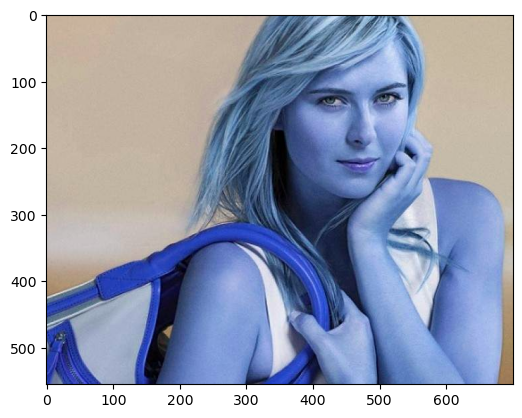

In [7]:
plt.imshow(img)
plt.show()

In [9]:
# converting into gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [11]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

In [13]:
gray.shape

(555, 700)

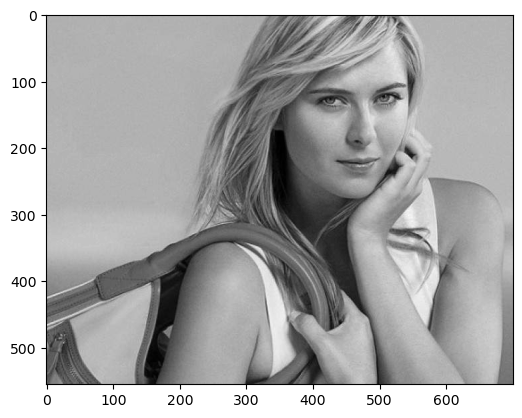

In [15]:
plt.imshow(gray, cmap='gray')
plt.show()

In [17]:
import os
import cv2

base_path = os.path.expanduser('~/Desktop/project/model/opencv/haarcascades')
face_cascade = cv2.CascadeClassifier(os.path.join(base_path, 'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(os.path.join(base_path, 'haarcascade_eye.xml'))

In [19]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [21]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

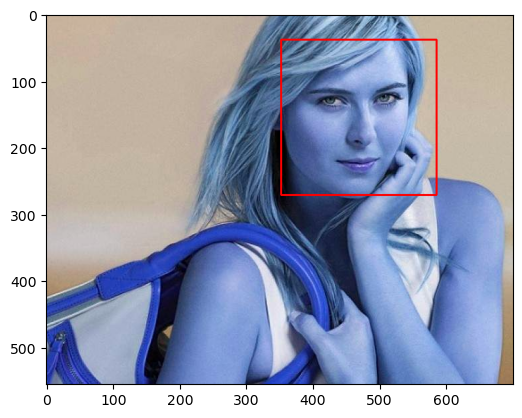

In [23]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
plt.show()

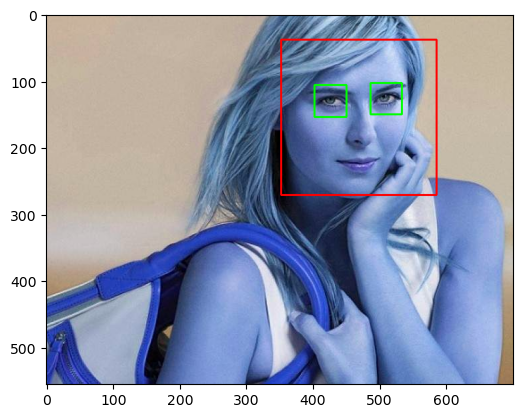

In [25]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [27]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

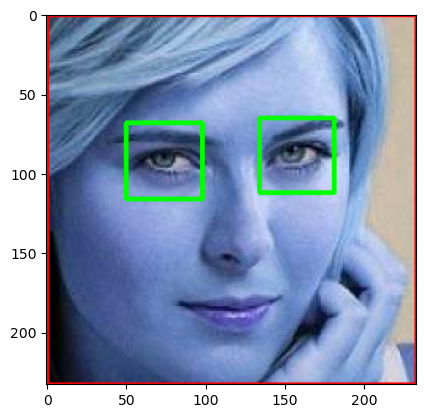

In [29]:
plt.show()

In [31]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image not loaded: {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = face_img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

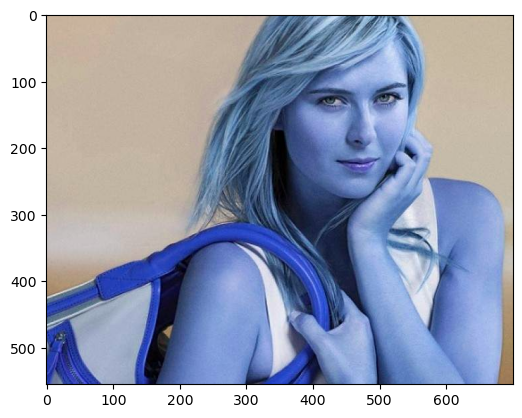

In [33]:
original_img = cv2.imread('Desktop/project/model/test_images/000_1PC30K.jpg')
plt.imshow(original_img)
plt.show()

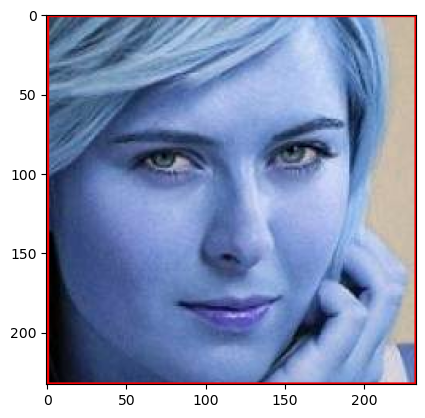

In [35]:
cropped_img=get_cropped_image_if_2_eyes('Desktop/project/model/test_images/000_1PC30K.jpg')
plt.imshow(cropped_img)
plt.show()

In [37]:
path_to_data="Desktop/project/model/dataset/"
path_to_cr_data="Desktop/project/model/dataset/cropped/cropped_"

In [39]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [41]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [43]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
valid_extensions = ('.jpg', '.jpeg', '.png')

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.name.lower().endswith(valid_extensions):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)
                
                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

virat_koli
Generating cropped images in folder:  Desktop/project/model/dataset/cropped/cropped_virat_koli
maria_sharapova
Generating cropped images in folder:  Desktop/project/model/dataset/cropped/cropped_maria_sharapova
MSD
Generating cropped images in folder:  Desktop/project/model/dataset/cropped/cropped_MSD
cropped
serena_williams
Generating cropped images in folder:  Desktop/project/model/dataset/cropped/cropped_serena_williams
roger_federer
Generating cropped images in folder:  Desktop/project/model/dataset/cropped/cropped_roger_federer


# 2. FEATURE ENGINEERING

In [46]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255;
    coeff=pywt.wavedec2(imArray,mode,level=level)
    coeffs_H=list(coeff)
    coeffs_H[0] *=0;
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H=np.uint8(imArray_H)

    return imArray_H

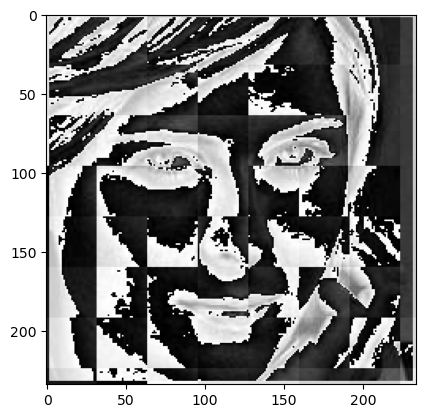

In [48]:
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')
plt.show()

In [50]:
celebrity_file_names_dict.keys()

dict_keys(['virat_koli', 'maria_sharapova', 'MSD', 'cropped', 'serena_williams', 'roger_federer'])

In [52]:
del celebrity_file_names_dict['cropped']

In [54]:
celebrity_file_names_dict.keys()

dict_keys(['virat_koli', 'maria_sharapova', 'MSD', 'serena_williams', 'roger_federer'])

In [94]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count=count+1
class_dict

{'virat_koli': 0,
 'maria_sharapova': 1,
 'MSD': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [96]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            print(f"⚠️ Warning: Could not read image {training_image}")
            continue  # Skip bad image
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

⚠️ Warning: Could not read image Desktop/project/model/dataset/cropped/cropped_virat_koli/virat_koli22.png
⚠️ Warning: Could not read image Desktop/project/model/dataset/cropped/cropped_maria_sharapova/maria_sharapova9.png
⚠️ Warning: Could not read image Desktop/project/model/dataset/cropped/cropped_maria_sharapova/maria_sharapova19.png
⚠️ Warning: Could not read image Desktop/project/model/dataset/cropped/cropped_MSD/MSD1.png
⚠️ Warning: Could not read image Desktop/project/model/dataset/cropped/cropped_MSD/MSD6.png
⚠️ Warning: Could not read image Desktop/project/model/dataset/cropped/cropped_MSD/MSD12.png
⚠️ Warning: Could not read image Desktop/project/model/dataset/cropped/cropped_MSD/MSD23.png


[ WARN:0@235.693] global loadsave.cpp:268 findDecoder imread_('Desktop/project/model/dataset/cropped/cropped_virat_koli/virat_koli22.png'): can't open/read file: check file path/integrity
[ WARN:0@235.716] global loadsave.cpp:268 findDecoder imread_('Desktop/project/model/dataset/cropped/cropped_maria_sharapova/maria_sharapova9.png'): can't open/read file: check file path/integrity
[ WARN:0@235.723] global loadsave.cpp:268 findDecoder imread_('Desktop/project/model/dataset/cropped/cropped_maria_sharapova/maria_sharapova19.png'): can't open/read file: check file path/integrity
[ WARN:0@235.814] global loadsave.cpp:268 findDecoder imread_('Desktop/project/model/dataset/cropped/cropped_MSD/MSD1.png'): can't open/read file: check file path/integrity
[ WARN:0@235.818] global loadsave.cpp:268 findDecoder imread_('Desktop/project/model/dataset/cropped/cropped_MSD/MSD6.png'): can't open/read file: check file path/integrity
[ WARN:0@235.836] global loadsave.cpp:268 findDecoder imread_('Desktop/

⚠️ Warning: Could not read image Desktop/project/model/dataset/cropped/cropped_serena_williams/serena_williams10.png
⚠️ Warning: Could not read image Desktop/project/model/dataset/cropped/cropped_serena_williams/serena_williams12.png
⚠️ Warning: Could not read image Desktop/project/model/dataset/cropped/cropped_serena_williams/serena_williams15.png
⚠️ Warning: Could not read image Desktop/project/model/dataset/cropped/cropped_serena_williams/serena_williams16.png
⚠️ Warning: Could not read image Desktop/project/model/dataset/cropped/cropped_serena_williams/serena_williams18.png
⚠️ Warning: Could not read image Desktop/project/model/dataset/cropped/cropped_roger_federer/roger_federer1.png
⚠️ Warning: Could not read image Desktop/project/model/dataset/cropped/cropped_roger_federer/roger_federer16.png


[ WARN:0@235.907] global loadsave.cpp:268 findDecoder imread_('Desktop/project/model/dataset/cropped/cropped_serena_williams/serena_williams10.png'): can't open/read file: check file path/integrity
[ WARN:0@235.910] global loadsave.cpp:268 findDecoder imread_('Desktop/project/model/dataset/cropped/cropped_serena_williams/serena_williams12.png'): can't open/read file: check file path/integrity
[ WARN:0@235.912] global loadsave.cpp:268 findDecoder imread_('Desktop/project/model/dataset/cropped/cropped_serena_williams/serena_williams15.png'): can't open/read file: check file path/integrity
[ WARN:0@235.912] global loadsave.cpp:268 findDecoder imread_('Desktop/project/model/dataset/cropped/cropped_serena_williams/serena_williams16.png'): can't open/read file: check file path/integrity
[ WARN:0@235.912] global loadsave.cpp:268 findDecoder imread_('Desktop/project/model/dataset/cropped/cropped_serena_williams/serena_williams18.png'): can't open/read file: check file path/integrity
[ WARN:0@2

In [98]:
len(X)

142

In [100]:
X= np.array(X).reshape(len(X),4096).astype(float)
X.shape

(142, 4096)

# 3. TRAINING THE MODEL

## SVM (SUPPORT VECTOR MACHINE)

In [104]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', C=10))
])

In [108]:
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.75

In [110]:
len(X_test)

36

In [112]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      1.00      1.00         6
           2       1.00      0.17      0.29         6
           3       0.88      0.70      0.78        10
           4       0.43      1.00      0.60         6

    accuracy                           0.75        36
   macro avg       0.86      0.75      0.72        36
weighted avg       0.87      0.75      0.74        36



In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [116]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [0.1,1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [118]:
scores = []
best_estimators = {}
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5)
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=stratified_cv, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

,model,best_score,best_params
0,svm,0.696970,"{'svc__C': 0.1, 'svc__kernel': 'linear'}"
1,random_forest,0.536797,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.744156,{'logisticregression__C': 1}


In [120]:
best_estimators['svm'].score(X_test,y_test)

0.8333333333333334

In [122]:
best_estimators['random_forest'].score(X_test,y_test)

0.6666666666666666

In [124]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7777777777777778

## 4. Save the trained model

In [127]:
best_clf = best_estimators['svm']

In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[7, 0, 0, 1, 0],
       [0, 5, 0, 0, 1],
       [0, 1, 4, 0, 1],
       [0, 1, 0, 9, 0],
       [0, 0, 0, 1, 5]])

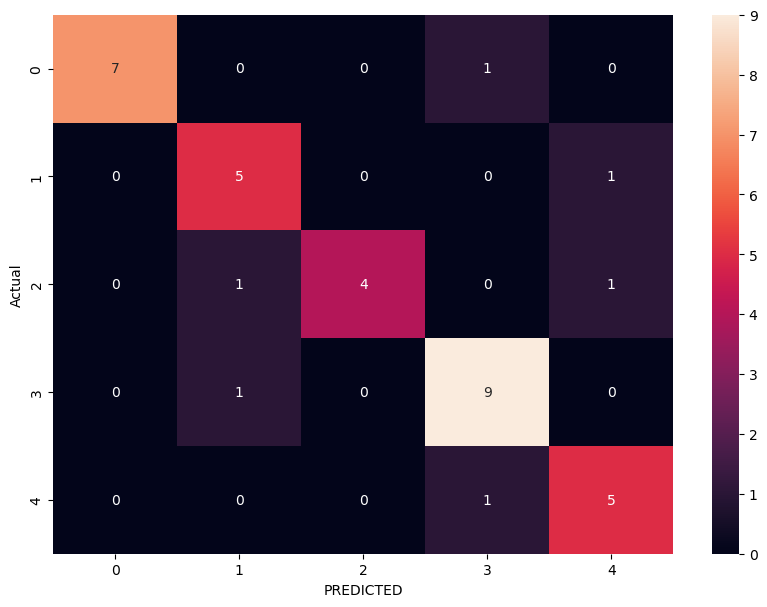

In [131]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("PREDICTED")
plt.ylabel("Actual")
plt.show()

In [133]:
class_dict

{'virat_koli': 0,
 'maria_sharapova': 1,
 'MSD': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [135]:
!pip install joblib
import joblib

In [137]:
joblib.dump(best_clf, "saved_model.pkl")

['saved_model.pkl']

In [141]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))